word_count 121535
distinct_word_count 12482
avg_word_length 4.6
positivity 8
[('COULD', 504), ('WHICH', 503), ('WOULD', 461), ('THEIR', 441), ('ELIZABETH', 398), ('THERE', 298), ('SHOULD', 244), ('DARCY', 215), ('NEVER', 214), ('THOUGH', 209)]


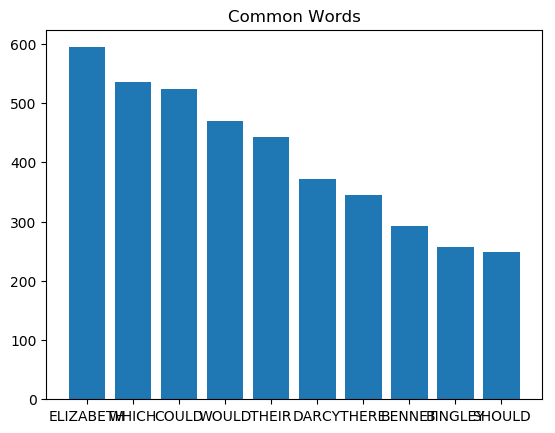

plot None
[('E', 69372), ('T', 46645), ('A', 41682), ('O', 40043), ('I', 37830), ('N', 37688), ('H', 34069), ('S', 33110), ('R', 32300), ('D', 22299), ('L', 21592), ('U', 14986), ('M', 14765), ('C', 13461), ('Y', 12705), ('W', 12308), ('F', 12001), ('G', 10033), (',', 9132), ('B', 9089), ('P', 8226), ('.', 6181), ('V', 5726), ('"', 3531), ('K', 3209), (';', 1538), ('Z', 936), ('J', 871), ('X', 839), ("'", 741), ('-', 723), ('Q', 627), ('!', 499), ('?', 462), (':', 133), ('1', 20), ('2', 19), ('(', 18), (')', 18), ('3', 17), ('4', 17), ('5', 17), ('6', 10), ('8', 7), ('7', 6), ('9', 6), ('0', 6), ('/', 4)]


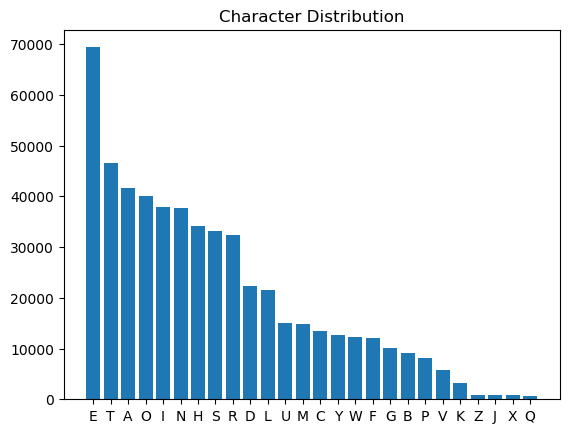

plot None


In [20]:
# -*- coding: utf8 -*-
import requests, re
from bs4 import BeautifulSoup
from collections import Counter
import statistics as stats
import string


#create your class here


import operator
import matplotlib.pyplot as plt; plt.rcdefaults()


class TextAnalyzer:
    def __init__(self, src, src_type='discover'):

        """Keyword arguments:
        src (str) -- text, path to file, or url
        src_type (str) -- The type of input (text, path, url, discover)"""

        if isinstance(src, str) == False or len(src) <= 0:
            raise Exception("Source must be a valid string, filepath or a valid URL")

        self._src = src
        self._src_type = src_type

        self._content = None
        self._orig_content = None

        self.set_values()

    def read_file(self, fname, mode='r'):
        with open (fname, mode) as f:
            return f.read()

    def set_values(self):

        if self._src.endswith('.txt'):
            self._src_type = 'path'
            self._content = self._orig_content=self.read_file(self._src)

        elif self._src.startswith('http'):
            self._src_type = 'url'
            r = requests.get(self._src)
            res = r.content
            self._orig_content = r.text
            self._content = res

        else:
            self._src_type = 'text'
            self._orig_content = self._src
            self._content = self._src

    def set_content_to_tag(self, tag, tag_id=None):
        """Changes _content to the text within a specific element of an HTML document
        Keyword arguments:
        tag (str) — Tag to read
        tag_id (str) — ID of tag to read
        It’s possible the HTML does not contain the tag being searched. You should use exception handling to catch any errors."""
        soup = BeautifulSoup(self._orig_content, "html.parser")
        content = soup.find('{}'.format(tag),{'id':'{}'.format(tag_id)})
        if content == None:
            raise Exception ("Tag or attribute not exist")
        self._content = content.getText()
        #print(content)

    def reset_content(self):
        """Resets _content to full text. Useful after a call to set_content_to_tag() """
        self._content = self._orig_content

    def _words(self, casesensitive=False):
        """Returns words in _content as list.
        Keyword arguments:
        casesensitive (bool) — If True makes all words uppercase"""
        words = (self._content).strip(string.whitespace + string.punctuation)
        if casesensitive == False:
            words= words.upper()
        return words.split()

    def common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        w_list= self._words()

        min_max_words = [item for item in w_list if len(item) >= minlen and len(item) <= maxlen]
        com_words= Counter(min_max_words)
        list_com_words= sorted(com_words.items(), key=operator.itemgetter(1), reverse=True)

        return list_com_words[:count]

    def char_distribution(self, casesensitive=False, letters_only=False):
        str_words = ''.join(self._words(casesensitive))
        if letters_only == True:
            str_words = (re.sub('[_\W\d]+', '', str_words))
        char_list = Counter(str_words)
        chars_list= sorted(char_list.items(), key=operator.itemgetter(1), reverse=True)
        return chars_list

    def plot_common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        w_list= self._words()
        w_list = [word.strip(string.punctuation + string.whitespace) for word in w_list]

        min_max_words = [item for item in w_list if len(item) >= minlen and len(item) <= maxlen]
        com_words= Counter(min_max_words)
        list_com_words= sorted(com_words.items(), key=operator.itemgetter(1), reverse=True)
        most_com_words= list_com_words[:count]

        keys1 = []
        values1 = []
        for item in most_com_words:
            keys1.append(item[0])
            values1.append(item[1])

        plt.bar(range(len(keys1)), values1, tick_label=keys1)
        # plt.savefig('bar.png')
        plt.title("Common Words")

        plt.show()

    def plot_char_distribution(self, casesensitive=False, letters_only=False):

        char_dist=self.char_distribution(casesensitive, letters_only)
       
        keys1 = []
        values1 = []
        for item in char_dist:
            keys1.append(item[0])
            values1.append(item[1])

        plt.bar(range(len(keys1)), values1, tick_label=keys1)
        plt.title("Character Distribution")
        plt.show()

    @property
    def avg_word_length(self):
        "Average word length"
        #words_list = self._words()
        words_list= self._content.split()
        word_len_list=[len(word) for word in words_list]
        length = sum(word_len_list) / len(word_len_list)
        return float('%.2f'%length)

    @property
    def distinct_word_count(self):
        "Number of distinct words in content"
        dis_words = Counter(self._words())
        return len(dis_words)

    @property
    def positivity(self):
        tally = 0
        words= self._words()

        neg_word_list= self.read_file('negative.txt', 'rb').split()
        neg_word_list = [item.decode('UTF-8') for item in neg_word_list]

        pos_word_list = self.read_file('positive.txt', 'r').split()

        for item in words:
            if item in pos_word_list: tally = tally + 1
            if item in neg_word_list: tally = tally -1

        return (round(tally / self.word_count * 1000))

    @property
    def word_count(self):
        "Number of words in content"
        return len(self._words())


    @property
    def words(self):
        return self._words()
    
    
##############

text = '''The outlook wasn't brilliant for the Mudville Nine that day;
the score stood four to two, with but one inning more to play.
And then when Cooney died at first, and Barrows did the same,
a sickly silence fell upon the patrons of the game.'''
url = 'https://www.webucator.com/how-to/address-by-bill-clinton-1997.cfm'

path = "pride-and-prejudice.txt"
#ta = TextAnalyzer(url)
ta=TextAnalyzer(path)
#ta = TextAnalyzer(text)
# print(ta._src)
# print(ta._src_type)
#print(ta._orig_content)

# print(ta._orig_content)
#fsta.set_content_to_tag('div','content-main')
#ta.set_content_to_tag('div' ,'device-xs visible-xs')
#print(ta._content)
#print(ta._words())
# ta.reset_content()
# print(ta._content)

#print("words", ta.words)
print("word_count", ta.word_count)
print("distinct_word_count", ta.distinct_word_count)
print("avg_word_length", ta.avg_word_length)
print("positivity", ta.positivity)
print(ta.common_words(minlen=5, maxlen=10))
print("plot", ta.plot_common_words(minlen=5, maxlen=10))

print(ta.char_distribution())
print("plot", ta.plot_char_distribution(letters_only=True))


